# Hyper-Parameter Tuning

* Hiper-parametre seçimi (hyper-parameter tuning) elinizle radyo frekansı ayarlamaya benziyor. Hani ses iyidir ama siz bi tık daha iyi olmasını istersiniz ve milimetrik parmak dokunuşları yaparsınız ya işte hiper-parametre seçimi de makine öğrenmesi modelleri için o işe yarıyor.

* Örnek veri seti olarak elimizde Portekiz bankasından alınmış 11 bin kişinin yaşı, mesleği, medeni durumu, ev kredisi alıp almadığı, son görüşmeden sonra geçen zaman, görüşmenin sabit telefonla mı cep telefonuyla mı gerçekleştiği gibi öznitelikler var.

**Kişilerin bankaya depozito yatırıp yatırmayacağını tahmin eden bir model kurmaya çalışıyoruz. Çıkacak sonuçlara göre belirli kişilere ve gruplara kişiselleştirilmiş pazarlama yöntemleri uygulanabilir.**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bank= pd.read_csv('bank_marketing.csv')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [176]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [177]:
bank.shape

(45211, 17)

In [178]:
bank.apply(lambda x: x.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [179]:
print('Unique Values of Each Features:\n')
for i in bank:
    print(f'{i}:\n{sorted(bank[i].unique())}\n')

Unique Values of Each Features:

age:
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]

job:
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

marital:
['divorced', 'married', 'single']

education:
['primary', 'secondary', 'tertiary', 'unknown']

default:
['no', 'yes']

balance:
[-8019, -6847, -4057, -3372, -3313, -3058, -2827, -2712, -2604, -2282, -2122, -2093, -2082, -2049, -1980, -1968, -1965, -1944, -1941, -1884, -1882, -1854, -1818, -1781, -1779, -1746, -1737, -1730, -1725, -1701, -1680, -1668, -1664, -1661, -1655, -1636, -1629, -1621, -1613, -1601, -1598, -1586, -1547, -1545, -1531, -1500, -1493, -1490, -1489, -1485,

In [180]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))
        
perc_col(bank,'y')

yes: %11.70
no: %88.30


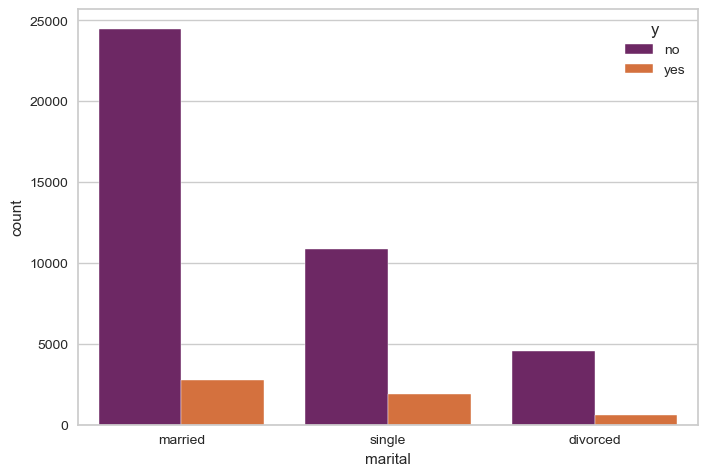

In [181]:
# plt.figure(figsize=(8,8))
sns.countplot(x = 'marital', hue = 'y', data=bank, palette = 'inferno')
plt.show()

Bekar insanların evli insanlara kıyasla bankada vadeli para tutma oranının fazla olduğunu görüyoruz.

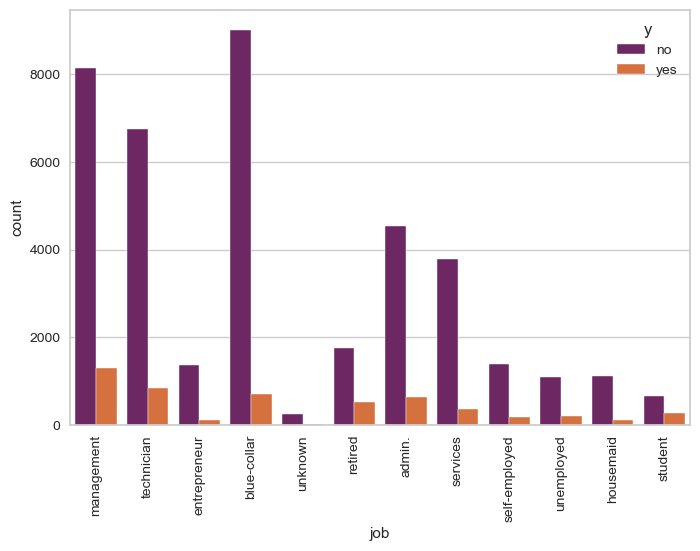

In [182]:
# plt.figure(figsize=(12,8))
sns.countplot(x = 'job', hue = 'y', data=bank,palette = 'inferno')
plt.xticks(rotation=90)
plt.show()

Yukarıdaki tabloda meslek dağılımlarına göre kişilerin bankaya vadeli para yatırıp yatırmadıklarını görüyoruz. Örneğin mavi yakalılarda durum hiç açıcı değil. Buradan hareketle farklı pazarlama kampanyaları düşünülebilir.

Son olarak depozita yatırmakla diğer değişkenler arasındaki korelasyona bakmak istiyorum. One-hot-encoder yöntemiyle kategorik değişkenleri binary (0,1) hale getiriyorum aksi halde makine ne cinsiyeti ne medeni durumu ne de iş güç hiçbir şey anlamaz.

In [183]:
df=pd.get_dummies(data=bank,drop_first=True)
df.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [184]:
# columns = df.select_dtypes(include='object').columns
# df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
# df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
#        'contact', 'month', 'poutcome', 'y', 'y_no'], axis =1)
# df.head()

Gördüğünüz gibi satır sayısı 17'den 52'ye çıktı. Sakın korkmayın bilgisayarlar için bu boyutlarda işlem yapmak hala çok kolay.

52*52 bir korelasyon matrisine bakmak pek mümkün değil onun için depozito yatırmakla en yüksek korelasyonu olan 10 değişkeni seçiyoruz.

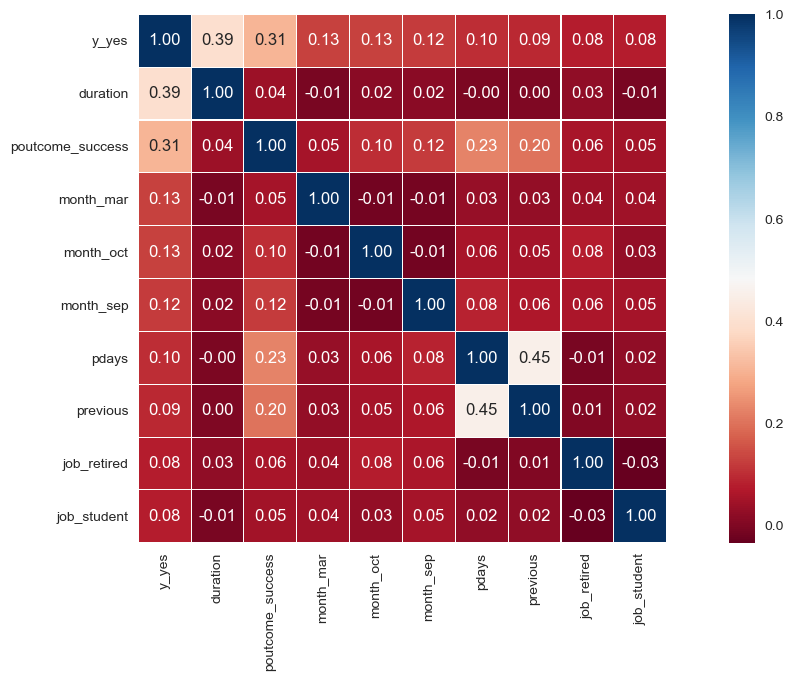

In [185]:
a,x = plt.subplots(figsize=(16, 7))
corr = df.corr()
max_corr = corr.nlargest(10, 'y_yes')['y_yes'].index
cm = np.corrcoef(df[max_corr].values.T)
matrix = sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
                 linewidths= 0.1, vmax = 1, cmap = 'RdBu',
                  yticklabels=max_corr.values, xticklabels=max_corr.values, ax = x)
plt.show()

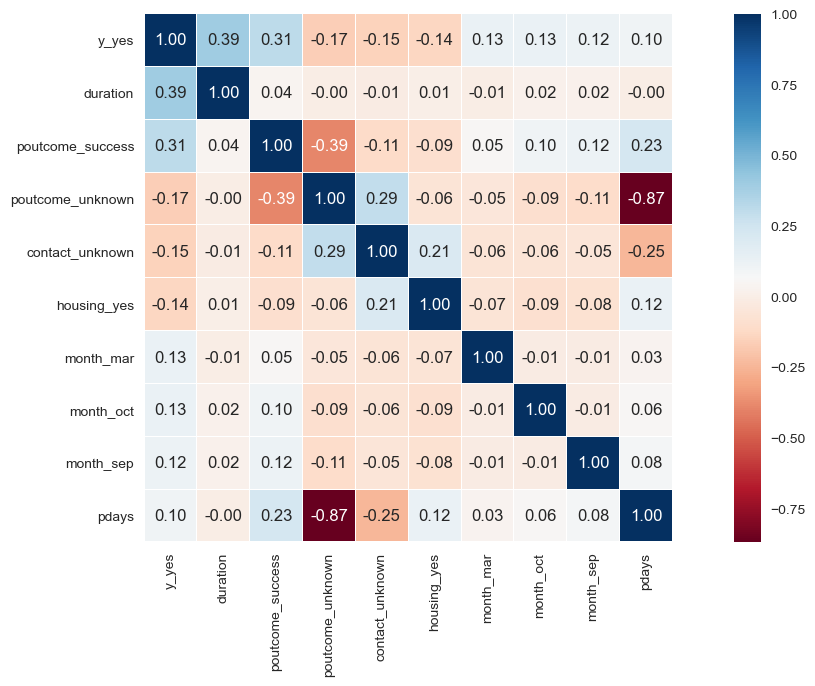

In [186]:
a,x = plt.subplots(figsize=(16, 7))
corr = df.corr()
max_corr = corr.abs().nlargest(10, 'y_yes')['y_yes'].index
cm = np.corrcoef(df[max_corr].values.T)
matrix = sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
                 linewidths= 0.1, vmax = 1, cmap = 'RdBu',
                  yticklabels=max_corr.values, xticklabels=max_corr.values, ax = x)
plt.show()

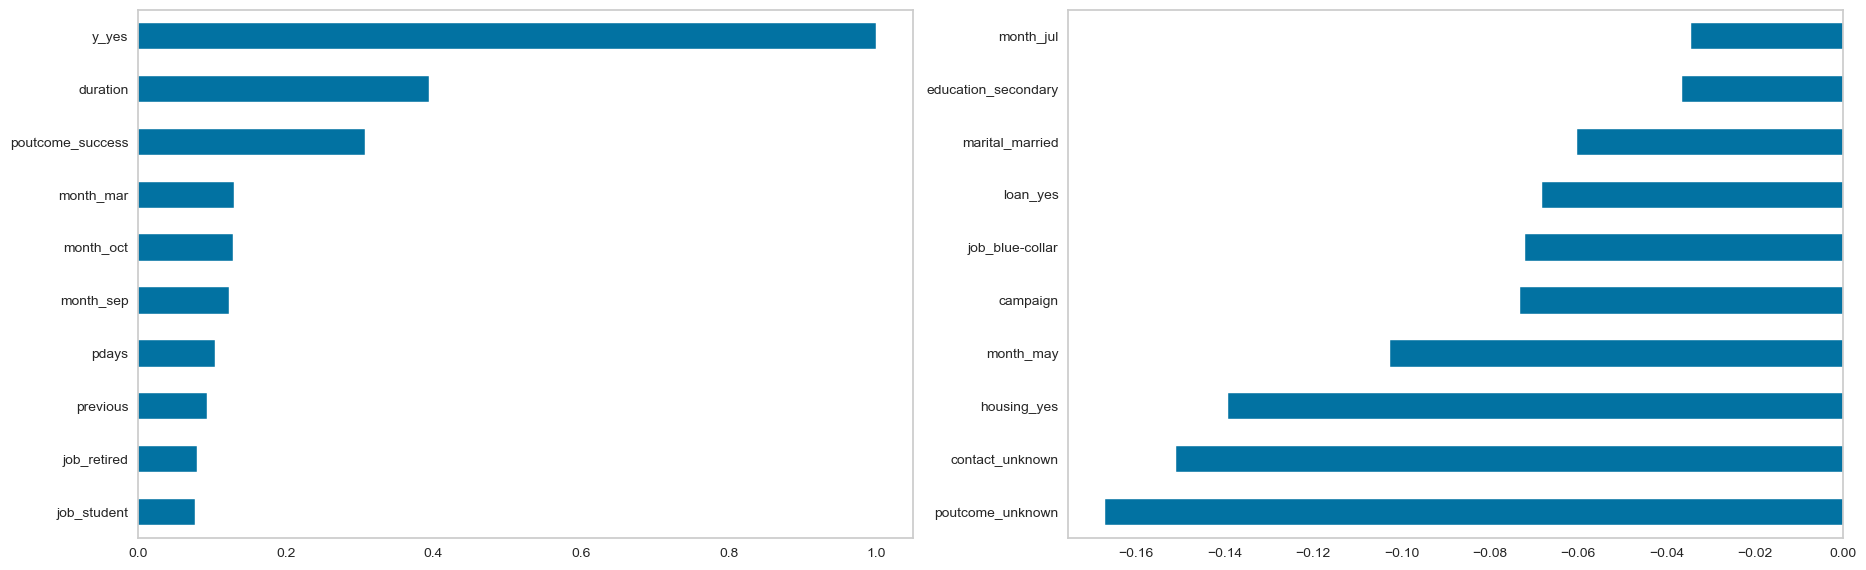

In [187]:
plt.figure(figsize=(22,7))
plt.subplot(121)
df.corr()["y_yes"].sort_values().tail(10).plot.barh()
plt.grid()
plt.subplot(122)
df.corr()["y_yes"].sort_values().head(10).plot.barh()
plt.grid()
plt.show()

Depozito yatırmakla en yüksek pozitif korelasyonu olan 5 öznitelik:
- Son telefon konuşmasının uzunluğu (son konuşmanın süresi 0'sa kişi telefonda ikna edilmemiştir, o yüzden çok iyi bir öznitelik olmayabilir.)
- Bir önceki pazarlama kampanyasının başarılı sonuç vermesi.
- Ev kredisi alınmaması.
- Konuşmanın sabit telefon yerine cep telefonu ile gerçekleşmesi.

# Deal with Outliers

In [188]:
categorical=bank.select_dtypes(include='object').columns.tolist()
numeric=bank.dtypes[bank.dtypes!=object].keys().tolist() # result of dtypes is Series, so we use keys(), not columns
print('Categorical Features:',categorical,'\nNumerical Features:',numeric,sep='\n')

Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


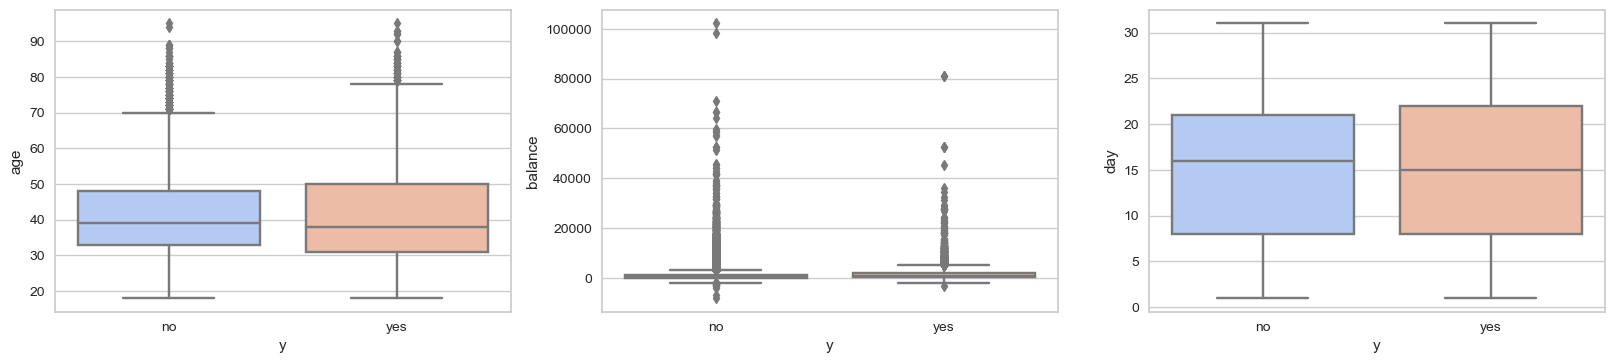

In [189]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='y', y='age', data=bank, palette="coolwarm",whis=1.5)
plt.subplot(132)
sns.boxplot(x='y', y='balance', data=bank, palette="coolwarm")
plt.subplot(133)
sns.boxplot(x='y', y='day', data=bank, palette="coolwarm")
plt.show()

In [190]:
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
bank.balance=bank.balance.apply(f)

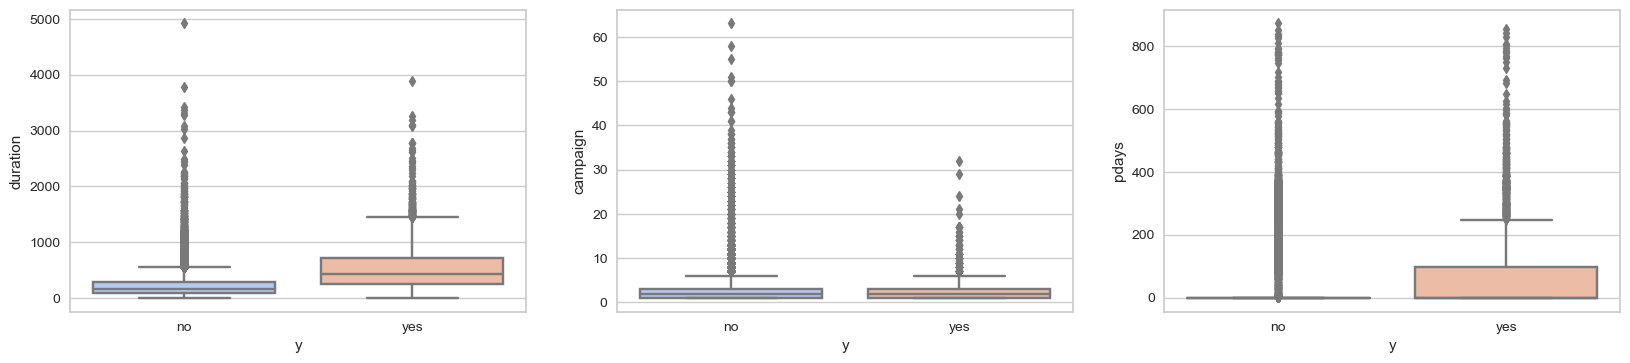

In [191]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='y', y='duration', data=bank, palette="coolwarm",whis=1.5)
plt.subplot(132)
sns.boxplot(x='y', y='campaign', data=bank, palette="coolwarm")
plt.subplot(133)
sns.boxplot(x='y', y='pdays', data=bank, palette="coolwarm")
plt.show()

In [192]:
bank.duration=bank.duration.apply(f)
bank.campaign=bank.campaign.apply(f)
bank.pdays=bank.pdays.apply(f)
bank.previous=bank.previous.apply(f)

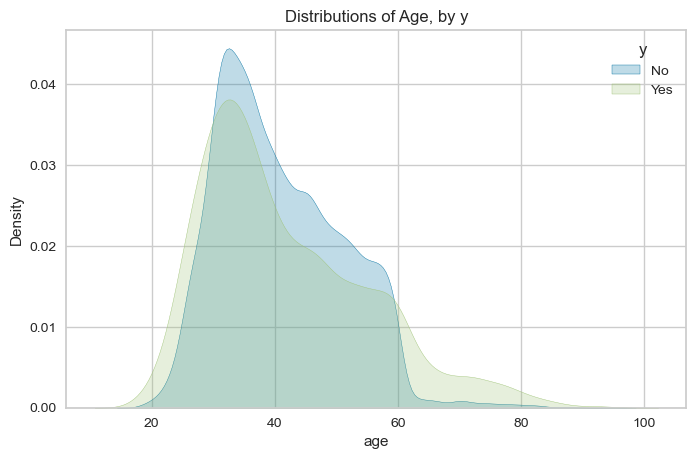

Average Age of y:Yes Customers: 42 
Average Tenure of y:No Customers: 41


In [193]:
y_age=bank[bank.y=='yes']['age']
not_y_age=bank[bank.y=='no']['age']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_age, shade=True)
sns.kdeplot(data=y_age, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of Age, by y")

plt.show()

print('Average Age of y:Yes Customers:',round(y_age.mean()),
      '\nAverage Tenure of y:No Customers:',round(not_y_age.mean()))

In [194]:
bank.balance.mean()

25.555366601050075

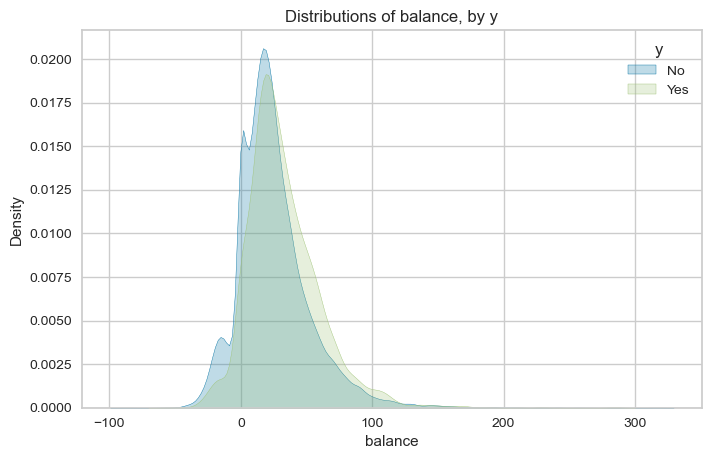

Averbalance balance of y:Yes Customers: 32 
Averbalance balance of y:No Customers: 25


In [195]:
y_balance=bank[bank.y=='yes']['balance']
not_y_balance=bank[bank.y=='no']['balance']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_balance, shade=True)
sns.kdeplot(data=y_balance, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of balance, by y")

plt.show()

print('Averbalance balance of y:Yes Customers:',round(y_balance.mean()),
      '\nAverbalance balance of y:No Customers:',round(not_y_balance.mean()))

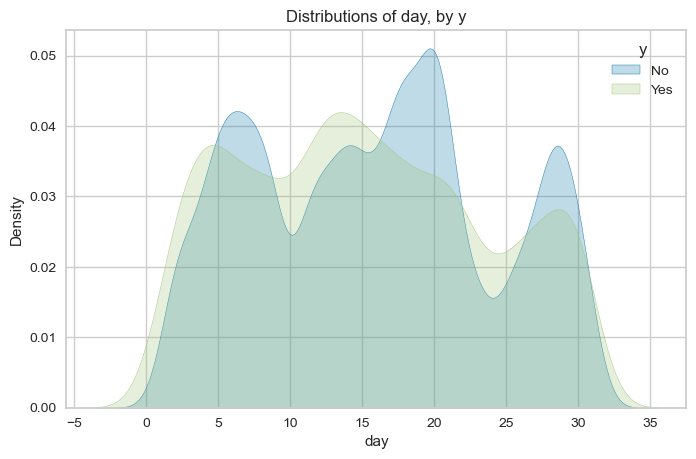

Averday day of y:Yes Customers: 15 
Averday day of y:No Customers: 16


In [196]:
y_day=bank[bank.y=='yes']['day']
not_y_day=bank[bank.y=='no']['day']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_day, shade=True)
sns.kdeplot(data=y_day, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of day, by y")

plt.show()

print('Averday day of y:Yes Customers:',round(y_day.mean()),
      '\nAverday day of y:No Customers:',round(not_y_day.mean()))

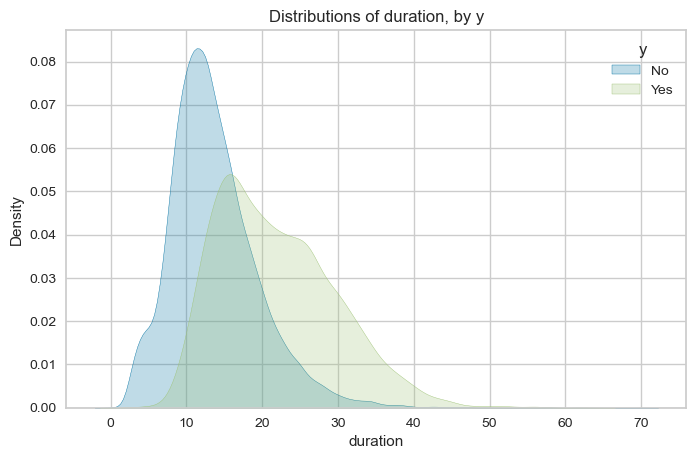

Averduration duration of y:Yes Customers: 22 
Averduration duration of y:No Customers: 14


In [197]:
y_duration=bank[bank.y=='yes']['duration']
not_y_duration=bank[bank.y=='no']['duration']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_duration, shade=True)
sns.kdeplot(data=y_duration, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of duration, by y")

plt.show()

print('Averduration duration of y:Yes Customers:',round(y_duration.mean()),
      '\nAverduration duration of y:No Customers:',round(not_y_duration.mean()))

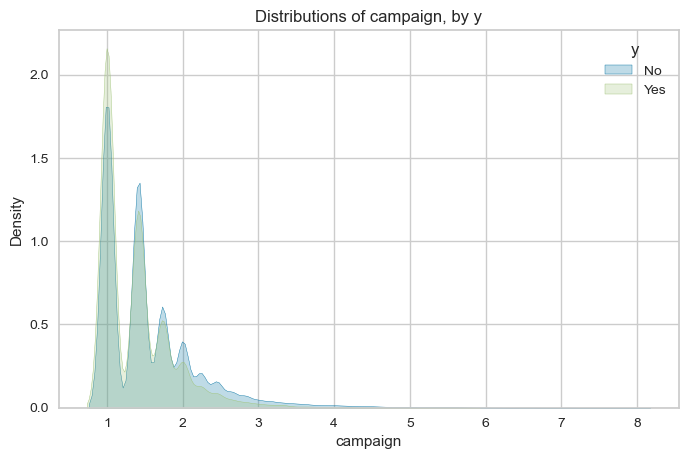

Avercampaign campaign of y:Yes Customers: 1.38 
Avercampaign campaign of y:No Customers: 1.55


In [198]:
y_campaign=bank[bank.y=='yes']['campaign']
not_y_campaign=bank[bank.y=='no']['campaign']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_campaign, shade=True)
sns.kdeplot(data=y_campaign, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of campaign, by y")

plt.show()

print('Avercampaign campaign of y:Yes Customers:',round(y_campaign.mean(),2),
      '\nAvercampaign campaign of y:No Customers:',round(not_y_campaign.mean(),2))

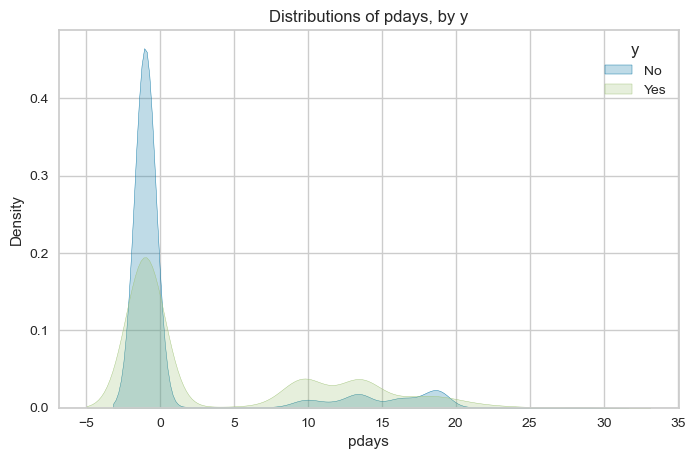

Averpdays pdays of y:Yes Customers: 4 
Averpdays pdays of y:No Customers: 2


In [199]:
y_pdays=bank[bank.y=='yes']['pdays']
not_y_pdays=bank[bank.y=='no']['pdays']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_pdays, shade=True)
sns.kdeplot(data=y_pdays, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of pdays, by y")

plt.show()

print('Averpdays pdays of y:Yes Customers:',round(y_pdays.mean()),
      '\nAverpdays pdays of y:No Customers:',round(not_y_pdays.mean()))

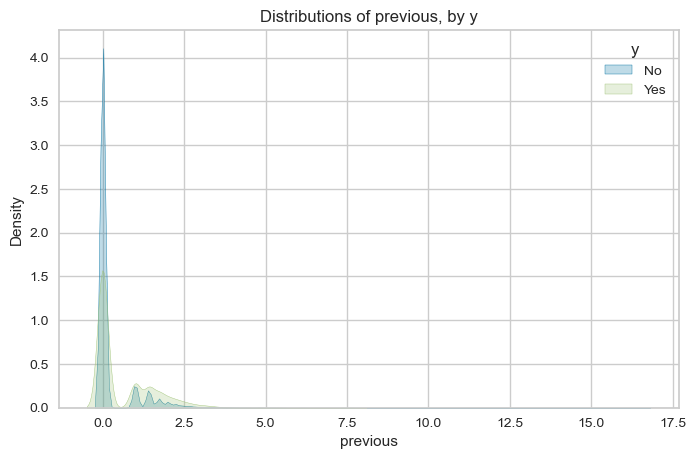

Averprevious previous of y:Yes Customers: 1 
Averprevious previous of y:No Customers: 0


In [200]:
y_previous=bank[bank.y=='yes']['previous']
not_y_previous=bank[bank.y=='no']['previous']

plt.figure(figsize=(8,5))
sns.kdeplot(data=not_y_previous, shade=True)
sns.kdeplot(data=y_previous, shade=True)
plt.legend(("No", "Yes"),title='y')
plt.title("Distributions of previous, by y")

plt.show()

print('Averprevious previous of y:Yes Customers:',round(y_previous.mean()),
      '\nAverprevious previous of y:No Customers:',round(not_y_previous.mean()))

In [201]:
bank['y_rate']=bank['y'].map({"no":0,"yes":1})

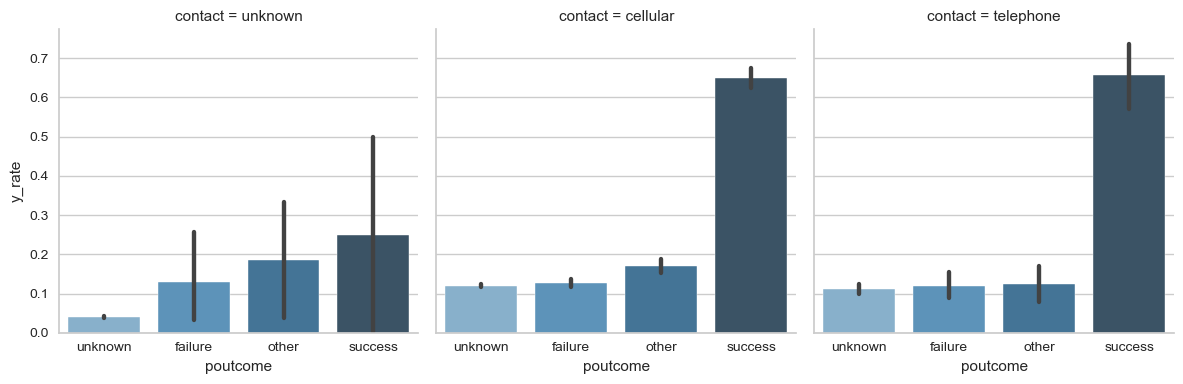

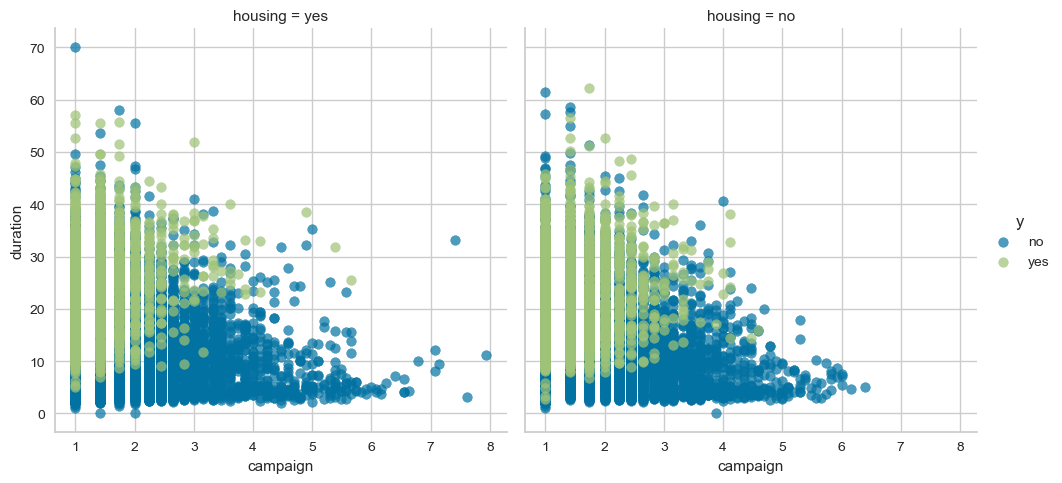

In [202]:
g = sns.FacetGrid(bank,col='contact',height=4)
ax = g.map(sns.barplot, "poutcome", "y_rate",palette = "Blues_d", order= bank['poutcome'].unique())

g=sns.FacetGrid(bank, col='housing', hue='y',height=5)
g.map(plt.scatter, 'campaign','duration',  alpha=0.7)
g.add_legend();

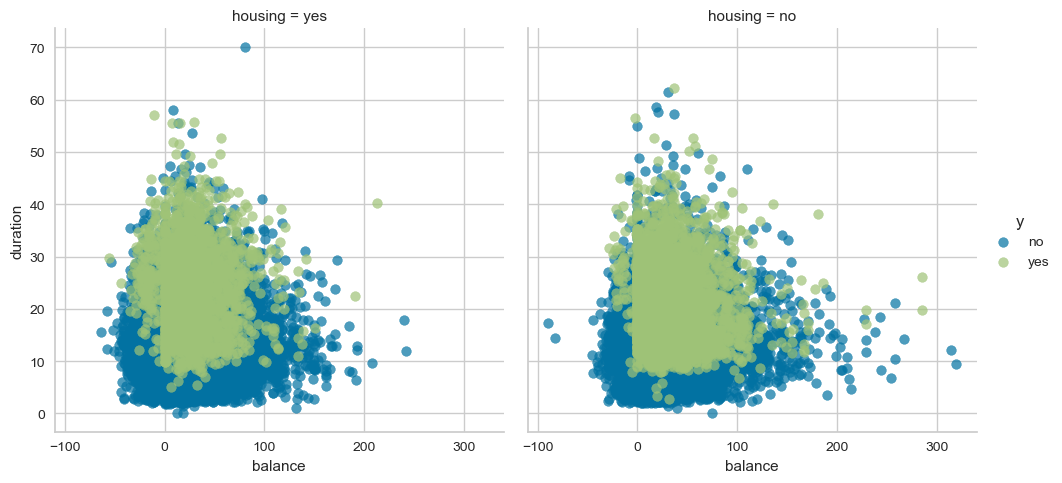

In [203]:
g=sns.FacetGrid(bank, col='housing', hue='y',height=5)
g.map(plt.scatter, 'balance','duration',  alpha=0.7)
g.add_legend();

In [204]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [205]:
df.to_csv("bank_marketing_clean.csv", index = False)